## Лабораторная работа 8

## 1. Основные понятия машинного обучения

### 1.1 Задача обучения

* $X$ - множество объектов
* $Y$ - множество меток классов
* $\overline{y}: X->Y$  — неизвестная зависимость

***Дано:***

$ x_1, ... x_m \subset X$ - обучающая выборка

$y_1 = \overline{y}(x_1), ... y_m = \overline{y}(x_m)$ - известные метки классов

***Найти*** 

Найти $a∶X→Y$ - алгоритм, решающую функцию, приближающую $y$ на всём множестве $X$.

### 1.2 Признаки

Каждый объект имеет ряд признаков. Например автомобиль имеет: цвет, тип кузова, мощность двигателся, объём багажника, наличие подушек безопасности. 

***Типы признаков***:

* Бинарный признак - принимает всего два значения, обычно 0 или 1. К примеру, наличие подушек безопасности - бинарный признак(либо есть либо нет).
* Категориальный признак - отражает некоторую категорию. К примеру, цвет - категориальный признак(красный, синий, белый и т.д).
* Числовой признак отражает числовое значение.  К примеру, мощность двигателя - числовой признак(100, 150, 180 и т.д).

### 1.3 Типы задач
* ***Классификация***
  * классификация на 2 класса - $Y = {-1, 1}$
  * классификация на k непересекающихся классов - $Y = {1...k}$
  * классификация на k пересекающихся классов
  
Цель: научиться определять, к какому классу принадлежит объект. 

* ***Восстановление регрессии***
$Y = \mathbb{R}$

Цель: получать прогноз - число на основе выборки объектов.

* ***Ранжирование***

$Y$ — конечное упорядоченное множество. 

Цель: научиться по множеству объектов получать множество рейтингов, упорядоченное согласно заданному отношению порядка.


## 2. Метод k-ближайших соседей

Метод k-ближайших соседей (англ. k-nearest neighbors algorithm, k-NN) — метрический алгоритм для автоматической классификации объектов или регрессии. Формально основой метода является гипотеза компактности. 

***Гипотеза компактности*** — в задачах классификации предположение о том, что схожие объекты гораздо чаще лежат в одном классе, чем в разных; или, другими словами, что классы образуют компактно локализованные подмножества в пространстве объектов. Это также означает, что граница между классами имеет достаточно простую форму.

P.S В математическом анализе и топологии есть понятие компактного множества (в некоторых случаях, например, в конечномерных пространствах, компактность равносильна замкнутости и ограниченности множества). Гипотеза компактности с этим понятием не имеет ничего общего и должна пониматься в «более бытовом» смысле этого слова.

Принцип работы алгоритма следующий.

Для определения класса тестового объекта нужно:

1. Вычислить расстояние до каждого из объектов обучающей выборки
2. Отобрать $k$ объектов обучающей выборки, расстояние до которых минимально
3. Класс тестового объекта — это класс, наиболее часто встречающийся среди $k$ ближайших соседей

Рассмотрим на следующем примере. Пусть у нас есть обучающая выборка из двух классов(синий и красный). Тестовый объект имеет серый цвет. 

1. Вначале вычисляется расстояние от тестового объекта до каждого объекта. 
2. Затем выбирается 5(может и не 5, а другое число) наиболее близких объектов обучающей выборки. 
3. Из 5 объектов - три красных, два синих, следовательно тестовый объект принадлежит красному классу. 

### 2.1 Примеры метрик(расстояний)

Может возникнуть вопрос, как считать расстояния? Есть несколько способов как сделать это. Наиболее популярными метриками являются:

* Евклидова метрика: $\rho(x,y) = \sqrt{\sum_{i=1} ^{n} (y_i - x_i)^2}$
* Манхэттенское Расстояние: $\rho(x,y) = \sqrt{\sum_{i=1} ^{n} |y_i - x_i|}$

### 2.2 Параметры и Гиперпараметры

Параметры - это величины, которые мы настраиваем в процессе обучения по обучающей выборке. В методе kNN нет как такового обучения - это очень простой эвристический алгоритм. Под параметрами в kNN можно понимать обучающую выборку. В другой трактовке у метода нет параметров, однако могут быть и веса, но сегодня мы их рассматривать не будем. 

Гиперпараметры - это величины, которые мы должны установить до начала обучения модели. Гиперпараметры не настраиваются по обучающей выборке в процессе обучения модели. Два самых важных гиперпараметры метода kNN - это число соседей k и метрика. Используя разные комбинации этих гиперпараметров, можно получать совершенно разное качество работы алгоритма. Гиперпараметры обычно настраивают по валидационной выборке или используя кросс-валидацию.

### 2.3 k-NN в Scikit-Learn

Scikit-Learn, или коротко Sklearn - библиотека, в которой реализованы практически все используемые сегодня алгоритмы машинного обучения. Нам необходимо познакомиться с интерфейсом библиотеки, чтобы понимать, как ее можно использовать на практике. Далее в курсе мы будем не только использовать готовые реализации из sklearn, но иногда и сами реализовывать алгоритмы в том же духе, в котором это сделано в этой библиотеке (с тем же интерфейсом).

Для реализации алгоритмов машинного обучения в sklearn всегда используется один интерфейс - класс с функциями fit(X, Y) для обучения модели по обучающей выборке $X, Y$ и predict(X) для возвращения предсказаний на выборке $X$. При создании класса можно указывать дополнительные параметры, влияющие на работу алгоритма машинного обучения.

Основные параметры класса sklearn.neighbors.KNeighborsClassifier:


* n_neighborsint, default=5 - Количество соседей, используемых по умолчанию для запросов.
* weights{'uniform', 'distance'}, callable или None, default='uniform' - Весовая функция, используемая при прогнозировании.
* metricstr, default='minkowski'

Рассмотрим на примере датасет "Титаник".

In [34]:
import seaborn as sns
data = sns.load_dataset('titanic')
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


рассматриваем только два признака: age (возраст), pclass (класс проезда) и будем предсказывать выживаемость alive.

In [35]:
data = data[['age', 'pclass', 'survived']]
data.head(5)

,age,pclass,survived
0,22.0,3,0
1,38.0,1,1
2,26.0,3,1
3,35.0,1,1
4,35.0,3,0


In [36]:
# для дальнейшей работы нам понадобится удалить пропуски. 
data = data.dropna()

In [37]:
from sklearn.neighbors import KNeighborsClassifier # импортируем библиотеку

Разобьём нашу выборку на обучающую и тестовую(ту которую будем предсказывать). Для этого воспользуемся train_test_split. 
test_size означает долю тестовой выборки от общей выборки. 

* X_train, X_test - содержит признаки.
* y_train, y_test - то что предсказываем(alive).

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data[['age', 'pclass']], data['survived'], test_size=0.25, random_state=42)

In [40]:
X_train.shape

(535, 2)

In [41]:
X_test.shape

(179, 2)

Теперь в нашей обучающей выборке 535 элементов, в тестовой 179.

### Теперь сам процесс обучения

In [42]:
kNN = KNeighborsClassifier(n_neighbors=10) # создаём модель
kNN.fit(X_train, y_train) # обучаем модель
print(f'accuracy: {accuracy_score(y_test, kNN.predict(X_test)) :.3}') # расчитываем точность алгоритма

accuracy: 0.665


C:\Users\79826\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


И так полученная точность составляет 0.665 на тестовой выборке. 

### Задача 0(5 баллов)

* поэкспериментируете с число соседей. Постройте график точности алгоритма от числа соседей. 
* поэкспериментируете с признаками датасета, вместо исходных признаков выберите два других численных признака. И расчитайте точность алгоритма. 
* Возьмите в качестве признаков все доступные целочисленные признаким. И подберите оптимальные гиперпараметры, дающие лучшую точность.
* Отнормируйте данные и попробуйте вновь посчитать качество модели

## 2. Введение в линейные модели

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

Напомним, что линейная регрессия &mdash; это модель следующего вида:
$$a(x) = \langle w, x \rangle + w_0$$
где $w \in \mathbb{R}^d$, $w_0 \in \mathbb{R}$. Обучить линейную регрессию &mdash; значит найти $w$ и $w_0$.

В машинном обучении часто говорят об *обобщающей способности модели*, то есть о способности модели работать на новых тестовых данных хорошо. Если модель будет идеально предсказывать выборку, на которой она обучалась, но при этом просто ее запомнит, не "вытащив" из данных никакой закономерности, от нее будет мало толку. Такую модель называют *переобученной*: она слишком подстроилась под обучающие примеры, не выявив никакой полезной закономерности, которая позволила бы ей совершать хорошие предсказания на данных, которые она ранее не видела.

Рассмотрим следующий пример, на котором будет хорошо видно, что значит переобучение модели. Для этого нам понадобится сгенерировать синтетические данные. Рассмотрим зависимость $y(x) = \cos(1.5\pi x)$, $y$ &mdash; целевая переменная, а $x$ - объект (просто число от 0 до 1). В жизни мы наблюдаем какое-то конечное количество пар объект-таргет, поэтому смоделируем это, взяв 30 случайных точек $x_i$ в отрезке $[0;1]$. Более того, в реальной жизни целевая переменная может быть зашумленной (измерения в жизни не всегда точны), смоделируем это, зашумив значение функции нормальным шумом: $\tilde{y}_i = y(x_i) + \mathcal{N}(0, 0.01)$.

Попытаемся обучить три разных линейных модели: признаки для первой &mdash;  $\{x\}$, для второй &mdash; $\{x, x^2, x^3, x^4\}$, для третьей &mdash; $\{x, \dots, x^{20}\}$.

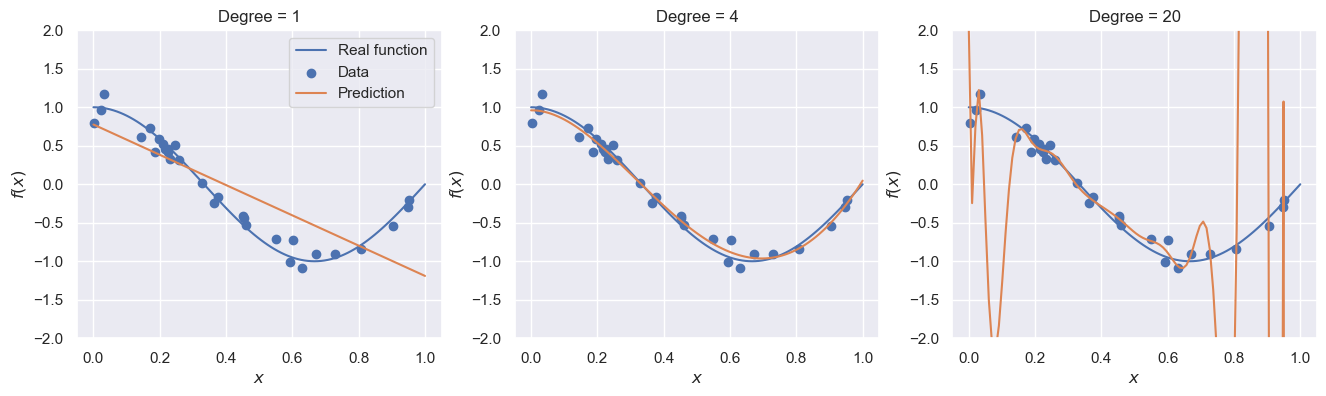

In [50]:
from sklearn.linear_model import LinearRegression

np.random.seed(36)
x = np.linspace(0, 1, 100)
y = np.cos(1.5 * np.pi * x)

x_objects = np.random.uniform(0, 1, size=30)
y_objects = np.cos(1.5 * np.pi * x_objects) + np.random.normal(scale=0.1, size=x_objects.shape)

from sklearn.preprocessing import PolynomialFeatures
fig, axs = plt.subplots(figsize=(16, 4), ncols=3)
for i, degree in enumerate([1, 4, 20]):
    X_objects = PolynomialFeatures(degree, include_bias=False).fit_transform(x_objects[:, None])
    X = PolynomialFeatures(degree, include_bias=False).fit_transform(x[:, None])
    regr = LinearRegression().fit(X_objects, y_objects)
    y_pred = regr.predict(X)
    axs[i].plot(x, y, label="Real function")
    axs[i].scatter(x_objects, y_objects, label="Data")
    axs[i].plot(x, y_pred, label="Prediction")
    if i == 0:
        axs[i].legend()
    axs[i].set_title("Degree = %d" % degree)
    axs[i].set_xlabel("$x$")
    axs[i].set_ylabel("$f(x)$")
    axs[i].set_ylim(-2, 2)

Чтобы избежать переобучения, модель регуляризуют. Обычно переобучения в линейных моделях связаны с большими весами, а поэтому модель часто штрафуют за большие значения весов, добавляя к функционалу качества, например, квадрат $\ell^2$-нормы вектора $w$:

$$Q_{reg}(X, y, a) = Q(X, y, a) + \lambda \|w\|_2^2$$

Это слагаемое называют $\ell_2$-регуляризатором, а коэффициент $\lambda$ &mdash; коэффициентом регуляризации. Более подробно о регуляризации и переобучении вы узнаете из лекций.

**Задача 1**: Почему первая модель получилась плохой, а третья переобучилась?

**Задача 2**: Почему большие веса в линейной модели &mdash; плохо?

**Задача 3**: Почему регуляризовать $w_0$ &mdash; плохая идея?

**Задача 4**: На что влияет коэффициент $\lambda$? Что будет происходить с моделью, если $\lambda$ начать уменьшать? Что будет, если $\lambda$ сделать слишком большим?

Мы будем работать с данными из соревнования [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview), в котором требовалось предсказать стоимость жилья.

In [53]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [54]:
data.shape

(1460, 81)

In [55]:
from sklearn.model_selection import train_test_split

data = data.drop(columns=["Id"])

y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

Первое, что стоит заметить &mdash; у нас в данных есть уникальное для каждого объекта поле id. Обычно такие поля только мешают и способствуют переобучению. Удалим это поле из данных.

Разделим данные на обучающую и тестовую выборки. Для простоты не будем выделять дополнительно валидационную выборку (хотя это обычно стоит делать, она нужна для подбора гиперпараметров модели, то есть параметров, которые нельзя подбирать по обучающей выборке). Дополнительно нам придется отделить значения целевой переменной от данных.

**Задача 5**: Почему поля типа id могут вызвать переобучение модели (не обязательно линейной)?

**Задача 6**: Почему стоит дополнительно отделять валидационную выборку?

**Задача 7**: Обратите внимание на фиксацию `random_state` при сплите данных. Почему это важно?

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

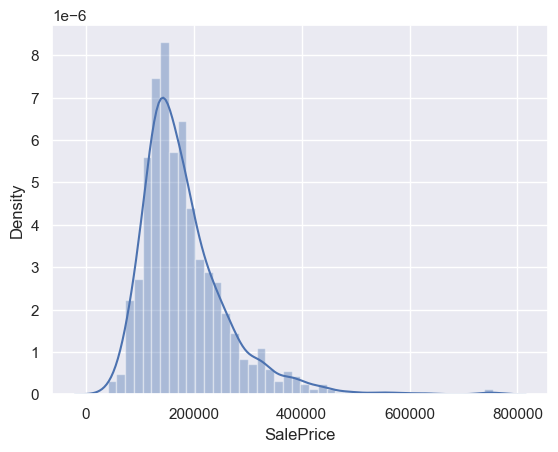

In [56]:
sns.distplot(y_train)

Так как для решения нашей задачи мы бы хотели обучить линейную регрессию, было бы хорошо найти признаки, "наиболее линейно" связанные с целевой переменной, иначе говоря, посмотреть на коэффициент корреляции Пирсона между признаками и целевой переменной. Корреляция Пирсона записывается следующим образом:

$$
\text{corr}(X, Y)=\frac{\operatorname{cov}_{X Y}}{\sigma_X \sigma_Y}=\frac{\sum_{i=1}^n(X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^n(X_i - \bar{X})^2 \sum_{i=1}^n(Y_i - \bar{Y})^2}}
$$

**Задача 8**: Что означает, что коэффициент корреляции Пирсона между двумя случайными величинами равен 1? -1? 0?

Заметим, что не все признаки являются числовыми, пока что мы не будем рассматривать такие признаки.

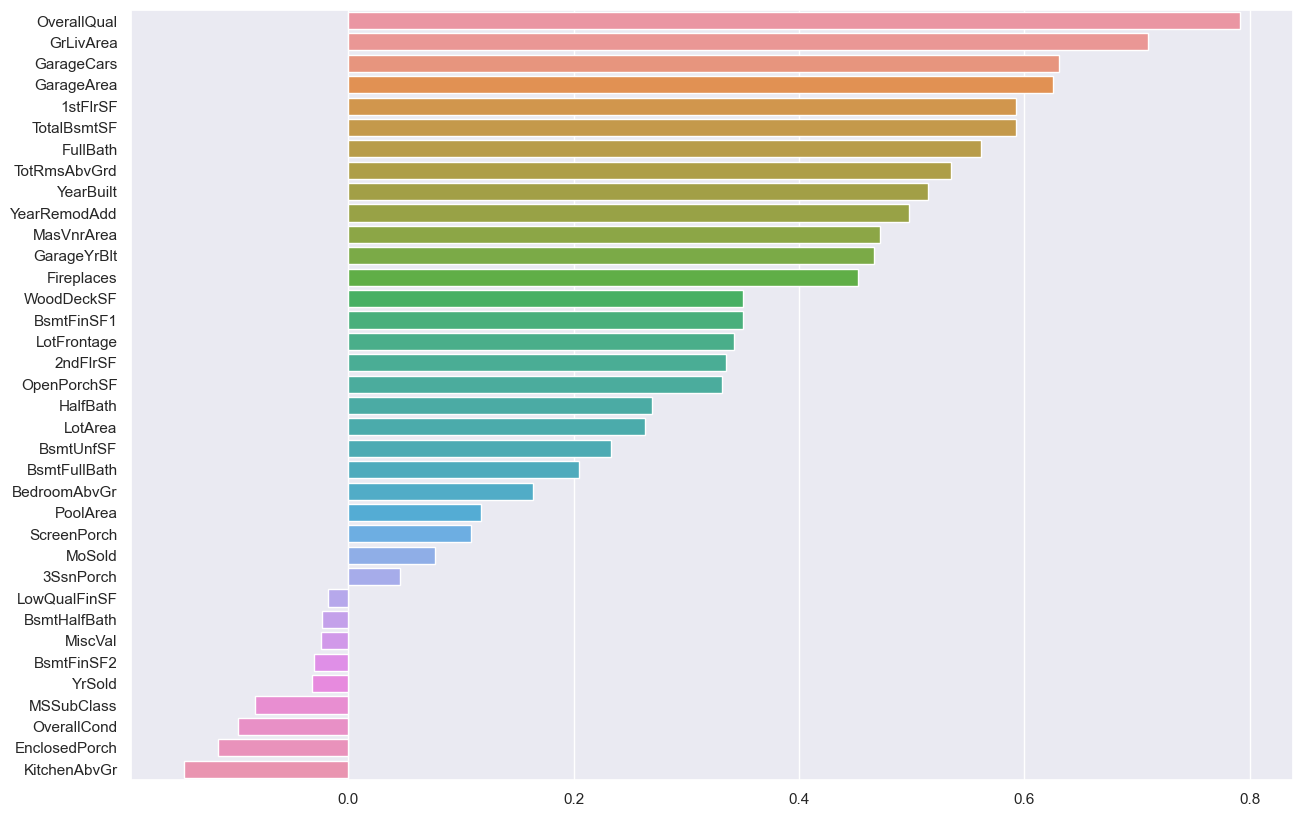

In [58]:
numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)


plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

### 2.2 Модель Линейной регрессии 

*Немного об обучении моделей*. В арсенале дата-саентиста кроме `pandas` и `matplotlib` должны быть библиотеки, позволяющие обучать модели. Для простых моделей (линейные модели, решающее дерево, ...) отлично подходит `sklearn`: в нем очень понятный и простой интерфейс. Несмотря на то, что в `sklearn` есть реализация бустинга и простых нейронных сетей, ими все же не пользуются и предпочитают специализированные библиотеки: `XGBoost`, `LightGBM` и пр. для градиентного бустинга над деревьями, `PyTorch`, `Tensorflow` и пр. для нейронных сетей. Так как мы будем обучать линейную регрессию, нам подойдет реализация из `sklearn`.

Попробуем обучить линейную регрессию на числовых признаках из нашего датасета. В `sklearn` есть несколько классов, реализующих линейную регрессию:
* [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) &mdash; "классическая" линейная регрессия с оптимизацией MSE. Веса находятся как точное решение: $w^* = (X^TX)^{-1}X^Ty$
* [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) &mdash; линейная регрессия с оптимизацией MSE и $\ell_2$-регуляризацией
* [`Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) &mdash; линейная регрессия с оптимизацией MSE и $\ell_1$-регуляризацией

У моделей из `sklearn` есть методы `fit` и `predict`. Первый принимает на вход обучающую выборку и вектор целевых переменных и обучает модель, второй, будучи вызванным после обучения модели, возвращает предсказание на выборке. Попробуем обучить нашу первую модель на числовых признаках, которые у нас сейчас есть:

In [59]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 32085.7681
Train RMSE = 35631.3131


Мы обучили первую модель и даже посчитали ее качество на отложенной выборке! Давайте теперь посмотрим на то, как можно оценить качество модели с помощью кросс-валидации. 

При кросс-валидации мы делим обучающую выборку на $n$ частей (fold). Затем мы обучаем $n$ моделей: каждая модель обучается при отсутствии соответствующего фолда, то есть $i$-ая модель обучается на всей обучающей выборке, кроме объектов, которые попали в $i$-ый фолд (out-of-fold). Затем мы измеряем качество $i$-ой модели на $i$-ом фолде. Так как он не участвовал в обучении этой модели, мы получим "честный результат". После этого, для получения финального значения метрики качества, мы можем усреднить полученные нами $n$ значений.

In [60]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train[numeric_features], y_train, cv=10, scoring="neg_root_mean_squared_error")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -38825.3172
	-45278.9230
	-31405.3380
	-33890.1048
	-73848.3061
	-24142.7915
	-45523.7066
	-52861.2908
	-26094.3376
	-29693.5005
Mean CV MSE = 40156.3616


Обратите внимание, что по отложенной выборке и при кросс-валидации мы считаем RMSE (Root Mean Squared Error), хотя в функционале ошибки при обучении модели используется MSE.

$$\text{RMSE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} (y_i - a(x_i))^2}$$

**Задача 9**: Почему оптимизация RMSE эквивалентна оптимизации MSE?

Давайте посмотрим на то, какие же признаки оказались самыми "сильными". Для этого визуализируем веса, соответствующие признакам. Чем больше вес &mdash; тем более сильным является признак.

In [61]:
def show_weights(features, weights, means, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=3)
    sorted_weights = sorted(zip(weights, features, means, scales), reverse=True)
    weights, features, means, scales = zip(*sorted_weights)
    features = list(features)
    
    sns.barplot(y=features, x=list(weights), ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=list(means), ax=axs[1])
    axs[1].set_xlabel("Mean")
    sns.barplot(y=features, x=list(scales), ax=axs[2])
    axs[2].set_xlabel("Scale")
    plt.tight_layout()

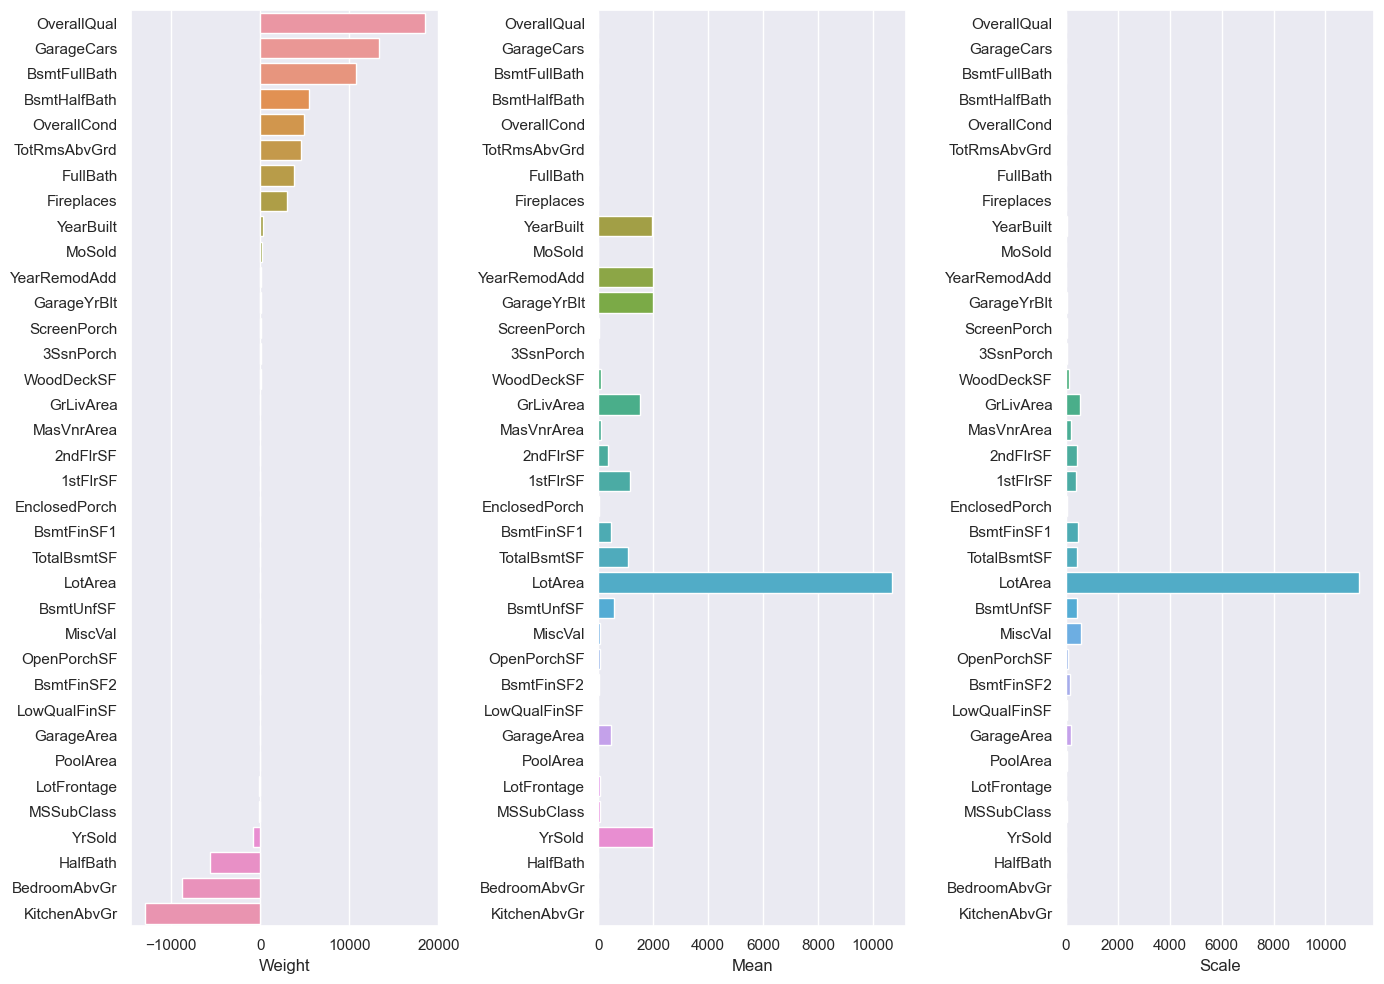

In [62]:
show_weights(numeric_features, model.coef_, X_train[numeric_features].mean(), X_train[numeric_features].std())

Будем масштабировать наши признаки перед обучением модели. Это, среди, прочего, сделает нашу регуляризацию более честной: теперь все признаки будут регуляризоваться в равной степени. 

Для этого воспользуемся трансформером [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Трансформеры в `sklearn` имеют методы `fit` и `transform` (а еще `fit_transform`). Метод `fit` принимает на вход обучающую выборку и считает по ней необходимые значения (например статистики, как `StandardScaler`: среднее и стандартное отклонение каждого из признаков). `transform` применяет преобразование к переданной выборке.

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 32085.3150
Train RMSE = 35631.2160


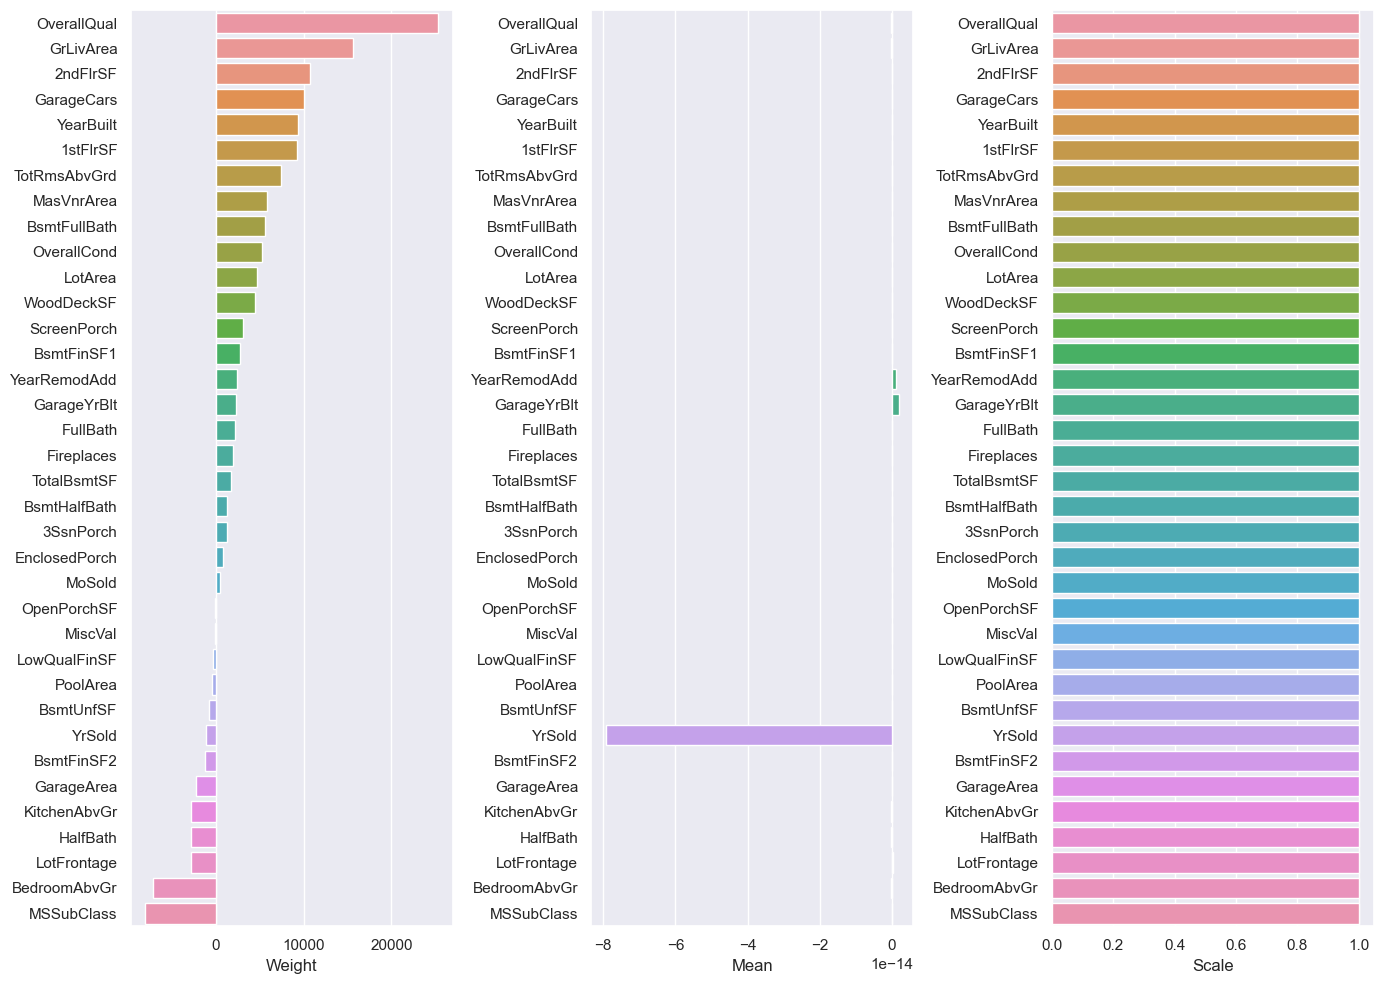

In [64]:
means = pd.Series(data=X_train_scaled.mean(axis=0), index=numeric_features)
scales = pd.Series(data=X_train_scaled.std(axis=0), index=numeric_features)
show_weights(numeric_features, model.coef_, means, scales)

Наряду с параметрами (веса $w$, $w_0$), которые модель оптимизирует на этапе обучения, у модели есть и гиперпараметры. У нашей модели это `alpha` &mdash; коэффициент регуляризации. Подбирают его обычно по сетке, измеряя качество на валидационной (не тестовой) выборке или с помощью кросс-валидации. Посмотрим, как это можно сделать (заметьте, что мы перебираем `alpha` по логарифмической сетке, чтобы узнать оптимальный порядок величины).

Best alpha = 297.6351


Text(0, 0.5, 'CV score')

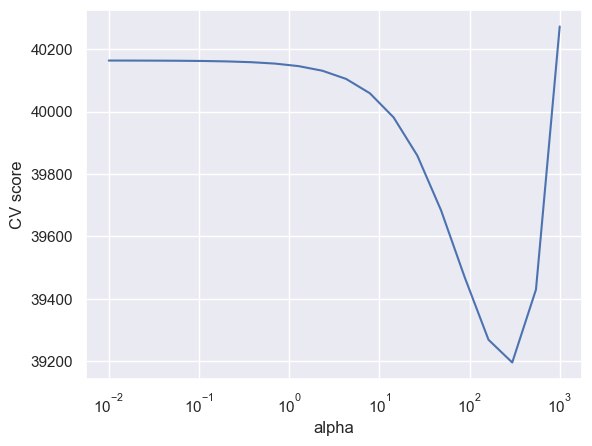

In [65]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

Попробуем обучить модель с подобранным коэффициентом регуляризации. Заодно воспользуемся очень удобным классом [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): обучение модели часто представляется как последовательность некоторых действий с обучающей и тестовой выборками (например, сначала нужно отмасштабировать выборку (причем для обучающей выборки нужно применить метод `fit`, а для тестовой &mdash; `transform`), а затем обучить/применить модель (для обучающей `fit`, а для тестовой &mdash; `predict`). `Pipeline` позволяет хранить эту последовательность шагов и корректно обрабатывает разные типы выборок: и обучающую, и тестовую.

In [66]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Ridge(best_alpha))
])

model = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 31703.3590
